In [ ]:
import pandas as pd
import time
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [ ]:

def analisi_stat(data):
    dataset = data
    mean= round(np.mean(dataset))
    median = round(np.median(dataset))
    mode= stats.mode(dataset)
    max = np.amax(data)
    return "M: {} Me: {} Max {}".format(mean, median, max)

In [ ]:

def set_color(data):
    dataset = data
    mean= round(np.mean(dataset[1:].to_numpy()))
    max = np.amax(data[1:].to_numpy())
    settegiorni = media_mobile(data[-7:].to_numpy(), 7)
    if settegiorni > mean and settegiorni > max*0.2:
        return 2
    elif settegiorni > mean*0.45:
        return 1
    else:
        return 0

In [ ]:
def media_mobile(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-province/dpc-covid19-ita-province.csv')

In [ ]:
# Rimuovo le colonne che reputo inutili - Da analizzare 
data.drop(columns=['lat', 'long', 'note_it', 'note_en', 'stato', 'codice_provincia', 'codice_regione'], inplace=True)

In [ ]:
# Ordino il dataset per data
data.sort_values(by=['data'], inplace=True)

In [ ]:
# Vedo la lista della province
data.denominazione_provincia.unique()

array(['Chieti', 'Caltanissetta', 'Agrigento',
       'In fase di definizione/aggiornamento', 'Sud Sardegna', 'Sassari',
       'Oristano', 'Nuoro', 'Cagliari', 'Taranto', 'Lecce', 'Foggia',
       'Brindisi', 'Catania', 'Barletta-Andria-Trani', 'Vercelli',
       'Verbano-Cusio-Ossola', 'Torino', 'Novara', 'Cuneo', 'Biella',
       'Asti', 'Alessandria', 'Isernia', 'Campobasso', 'Bari', 'Messina',
       'Palermo', 'Ragusa', 'Vicenza', 'Verona', 'Venezia', 'Treviso',
       'Rovigo', 'Padova', 'Belluno', 'Aosta', 'Terni', 'Perugia',
       'Trento', 'Siena', 'Prato', 'Pistoia', 'Pisa', 'Massa Carrara',
       'Lucca', 'Livorno', 'Grosseto', 'Firenze', 'Arezzo', 'Trapani',
       'Siracusa', 'Pesaro e Urbino', 'Macerata', 'Enna', 'Ascoli Piceno',
       "Reggio nell'Emilia", 'Ravenna', 'Piacenza', 'Parma', 'Modena',
       'Forlì-Cesena', 'Ferrara', 'Bologna', 'Salerno', 'Napoli',
       'Caserta', 'Benevento', 'Avellino', 'Vibo Valentia',
       'Reggio di Calabria', 'Crotone', 'Cosen

In [ ]:
# Ipoteticamente valutiamo di rimuovere le righe con "In fase di definizione/aggiornamento" nel campo denominazione_provincia
# Ma è una valutazione che dobbiamo fare verificando i dati
indexNames = data[ (data['denominazione_provincia'] == 'In fase di definizione/aggiornamento')].index
data.drop(indexNames , inplace=True)

In [ ]:
# Verifico che non ci sia più "in fase di definizione/aggiornamento"
data.denominazione_provincia.unique()

array(['Chieti', 'Caltanissetta', 'Agrigento', 'Sud Sardegna', 'Sassari',
       'Oristano', 'Nuoro', 'Cagliari', 'Taranto', 'Lecce', 'Foggia',
       'Brindisi', 'Catania', 'Barletta-Andria-Trani', 'Vercelli',
       'Verbano-Cusio-Ossola', 'Torino', 'Novara', 'Cuneo', 'Biella',
       'Asti', 'Alessandria', 'Isernia', 'Campobasso', 'Bari', 'Messina',
       'Palermo', 'Ragusa', 'Vicenza', 'Verona', 'Venezia', 'Treviso',
       'Rovigo', 'Padova', 'Belluno', 'Aosta', 'Terni', 'Perugia',
       'Trento', 'Siena', 'Prato', 'Pistoia', 'Pisa', 'Massa Carrara',
       'Lucca', 'Livorno', 'Grosseto', 'Firenze', 'Arezzo', 'Trapani',
       'Siracusa', 'Pesaro e Urbino', 'Macerata', 'Enna', 'Ascoli Piceno',
       "Reggio nell'Emilia", 'Ravenna', 'Piacenza', 'Parma', 'Modena',
       'Forlì-Cesena', 'Ferrara', 'Bologna', 'Salerno', 'Napoli',
       'Caserta', 'Benevento', 'Avellino', 'Vibo Valentia',
       'Reggio di Calabria', 'Crotone', 'Cosenza', 'Catanzaro', 'Bolzano',
       'Potenza', 

In [ ]:
# Creo singoli dataset divisi per provincia
# Inserisco i dataset all'interno di un dizionario richiamabile per nome provincia 
mappa_province = {}
for provincia, df_provincia in data.groupby('denominazione_provincia'):
    df_provincia['casi_giornalieri'] = df_provincia.totale_casi - df_provincia.totale_casi.shift(1)
    mappa_province.update({df_provincia.denominazione_provincia.describe()[2]:df_provincia})

In [ ]:
mappa_province['Campobasso']

,data,denominazione_regione,denominazione_provincia,sigla_provincia,totale_casi,casi_giornalieri
67,2020-02-24T18:00:00,Molise,Campobasso,CB,0,NaN
195,2020-02-25T18:00:00,Molise,Campobasso,CB,0,0.0
323,2020-02-26T18:00:00,Molise,Campobasso,CB,0,0.0
451,2020-02-27T18:00:00,Molise,Campobasso,CB,0,0.0
579,2020-02-28T18:00:00,Molise,Campobasso,CB,0,0.0
...,...,...,...,...,...,...
14147,2020-06-13T17:00:00,Molise,Campobasso,CB,361,0.0
14275,2020-06-14T17:00:00,Molise,Campobasso,CB,361,0.0
14403,2020-06-15T17:00:00,Molise,Campobasso,CB,361,0.0
14531,2020-06-16T17:00:00,Molise,Campobasso,CB,361,0.0


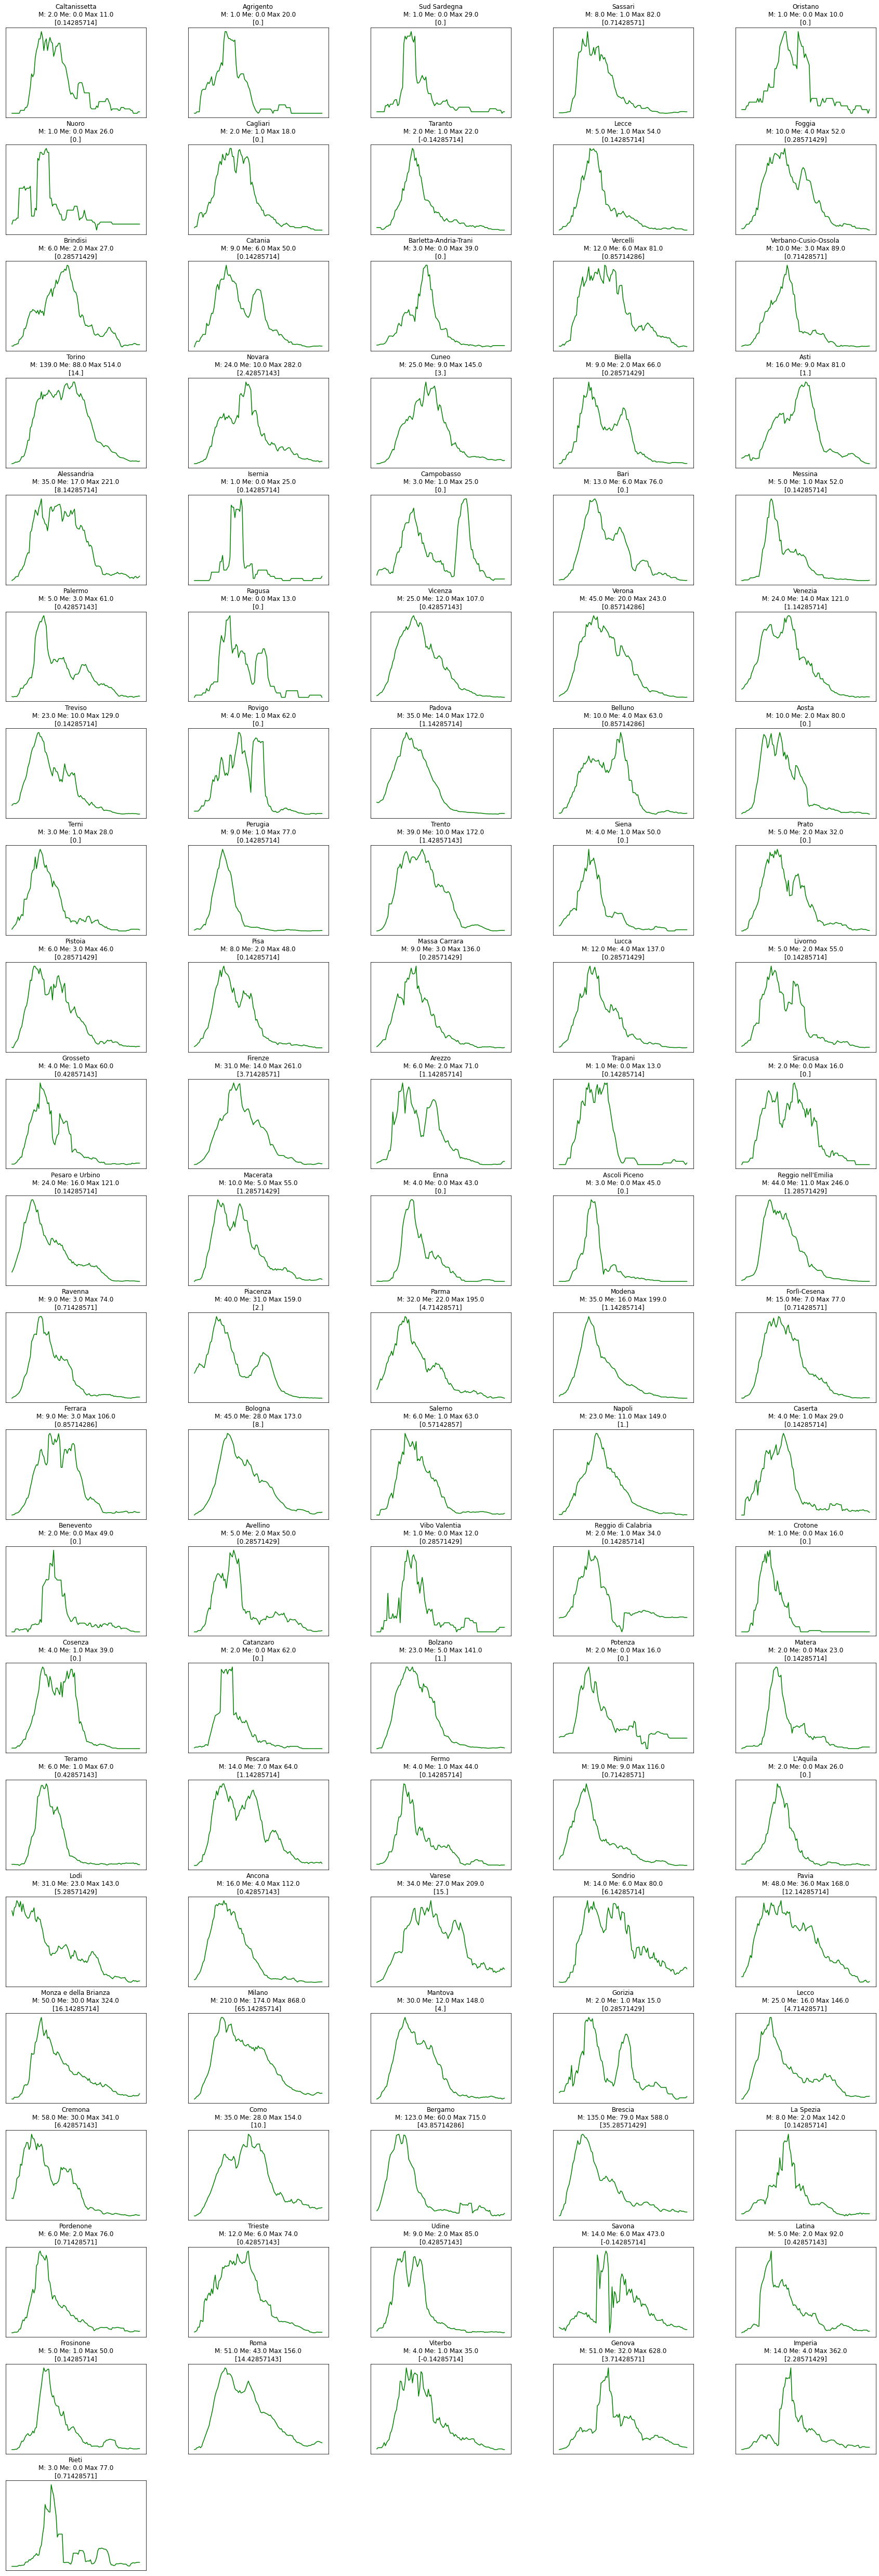

In [ ]:
# Funzione morbida
fig = plt.figure(figsize=(30,90))
fig.subplots_adjust(hspace=0.3, wspace=0.3)
for i in range(1, len(data.denominazione_provincia.unique())):
#for i in range(1, 10):
    ax = fig.add_subplot(22, 5, i)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    provincia = str(data.denominazione_provincia.unique()[i])
    statistiche = analisi_stat(mappa_province[data.denominazione_provincia.unique()[i]]['casi_giornalieri'][1:].to_numpy())
    utimi7giorni = media_mobile(mappa_province[data.denominazione_provincia.unique()[i]]['casi_giornalieri'][-7:].to_numpy(), 7)
    title = provincia +'\n'+ str(statistiche) +'\n'+str(utimi7giorni)
    ax.set_title(title)
    # Dato con casi giornalieri
    y_df_np = mappa_province[data.denominazione_provincia.unique()[i]]['casi_giornalieri'].to_numpy()
    y = media_mobile(y_df_np, 10)
    #y = mappa_province[data.denominazione_provincia.unique()[i]]['data']
    # Dato generale
    #x = mappa_province[data.denominazione_provincia.unique()[i]]
    if set_color(mappa_province[data.denominazione_provincia.unique()[i]]['casi_giornalieri']) == 0:
        ax.plot(y,color='green')
    elif set_color(mappa_province[data.denominazione_provincia.unique()[i]]['casi_giornalieri']) == 1:
        ax.plot(y,color='orange')
    elif set_color(mappa_province[data.denominazione_provincia.unique()[i]]['casi_giornalieri']) == 2:
        ax.plot(y,color='red')
    else:
        ax.plot(y,color='purple')
    #x.plot(x='data',y='casi_giornalieri',kind='density', ax=ax, title=str(data.denominazione_provincia.unique()[i]));

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
fig.savefig('/content/drive/My Drive/covid19/grafici2.png',bbox_inches='tight', pad_inches=0)